In [33]:
import pickle
import pandas as pd
import torch

def process_tensor_list(tensor_list):
    # 각 sublist의 텐서를 처리하여 숫자 리스트로 변환
    return [[tensor.detach().numpy().tolist() for tensor in sublist] for sublist in tensor_list]

def process_tensor_field(field):
    # 텐서 필드 처리
    return [[tensor.item() for tensor in sublist[0]] for sublist in field]

with open('targets.pkl', 'rb') as f:
    target_value_list = pickle.load(f)
with open('mean_predictions.pkl', 'rb') as f:
    mean_prediction_list = pickle.load(f)
with open('nearest_predictions.pkl', 'rb') as f:
    temporal_best_prediction_list = pickle.load(f)
with open('top_three_intermediate_predictions.pkl', 'rb') as f:
    intermediate_prediction_list = pickle.load(f)
with open('top_three_optimized_predictions.pkl', 'rb') as f:
    optimized_prediction_list = pickle.load(f)

# 모든 텐서 리스트를 처리
target_value_list = process_tensor_field(target_value_list)
mean_prediction_list = process_tensor_field(mean_prediction_list)
temporal_best_prediction_list = process_tensor_field(temporal_best_prediction_list)
intermediate_prediction_list = process_tensor_list(intermediate_prediction_list)
optimized_prediction_list = process_tensor_list(optimized_prediction_list)

for i in range(10):
    df = pd.DataFrame(
        data=[
            [target_value_list[i][0], mean_prediction_list[i][0], temporal_best_prediction_list[i][0], [sublist[0] for sublist in intermediate_prediction_list][i][0][0], [sublist[1] for sublist in intermediate_prediction_list][i][0][0], [sublist[2] for sublist in intermediate_prediction_list][i][0][0], [sublist[0] for sublist in optimized_prediction_list][i][0][0], [sublist[1] for sublist in optimized_prediction_list][i][0][0], [sublist[2] for sublist in optimized_prediction_list][i][0][0]],
            [target_value_list[i][1], mean_prediction_list[i][1], temporal_best_prediction_list[i][1], [sublist[0] for sublist in intermediate_prediction_list][i][0][1], [sublist[1] for sublist in intermediate_prediction_list][i][0][1], [sublist[2] for sublist in intermediate_prediction_list][i][0][1], [sublist[0] for sublist in optimized_prediction_list][i][0][1], [sublist[1] for sublist in optimized_prediction_list][i][0][1], [sublist[2] for sublist in optimized_prediction_list][i][0][1]]    
            ]
            , index=['PI', 'Do'], columns=['Target', 'Mean', 'Nearest with target', 'Min loss 1', 'Min loss 2', 'Min loss 3', 'Optimized min loss 1', 'Optimized min loss 2', 'Optimized min loss 3']
    )
    print(df)
    df.to_csv('predictions_' + str(i) + '.csv', index=False)

      Target      Mean  Nearest with target  Min loss 1  Min loss 2  \
PI  0.200000  0.370767             0.211078    0.179353    0.211078   
Do  0.310345  0.305098             0.300882    0.418706    0.300882   

    Min loss 3  Optimized min loss 1  Optimized min loss 2  \
PI    0.204492              0.144874              0.175290   
Do    0.409946              0.431168              0.332977   

    Optimized min loss 3  
PI              0.170287  
Do              0.431817  
      Target      Mean  Nearest with target  Min loss 1  Min loss 2  \
PI  0.800000  0.668846             0.801845    0.647522    0.579518   
Do  0.103448  0.134484             0.102371    0.175046    0.205077   

    Min loss 3  Optimized min loss 1  Optimized min loss 2  \
PI    0.656641              0.698226              0.630591   
Do    0.104182              0.121779              0.161898   

    Optimized min loss 3  
PI              0.707254  
Do              0.055101  
      Target      Mean  Nearest with

In [43]:
import pickle
import pandas as pd
import numpy as np

with open('./dataset/test_dataset2-1.pkl', 'rb') as f:
    sample_test_dataset = pickle.load(f)

inputs_tensor = sample_test_dataset.input
inputs_array = inputs_tensor.numpy()
target_tensor = sample_test_dataset.target
target_array = target_tensor.numpy()

inputs_df = pd.DataFrame({
    'intensity': inputs_array[:, 0],
    'PI': target_array[:, 0],
    'Do': target_array[:, 1],
    'exposure_time': inputs_array[:, 1],
    'cured_height': inputs_array[:, 2],
})

# DataFrame 확인
print(inputs_df)

# 필요하다면 DataFrame을 CSV 파일로 저장
inputs_df.to_csv('sample_inputs_data.csv', index=False)

    intensity   PI        Do  exposure_time  cured_height
0    0.000000  0.8  0.103448       0.816667      0.027778
1    0.333333  0.8  0.103448       0.900000      0.381944
2    0.333333  0.8  0.103448       0.200000      0.000000
3    1.000000  0.8  0.103448       0.783333      0.562500
4    0.333333  0.8  0.103448       0.233333      0.048611
5    0.777778  0.8  0.103448       0.250000      0.236111
6    1.000000  0.8  0.103448       0.433333      0.423611
7    0.888889  0.8  0.103448       0.100000      0.020833
8    0.555556  0.8  0.103448       0.216667      0.131944
9    0.111111  0.8  0.103448       0.966667      0.243056
10   1.000000  0.8  0.103448       0.166667      0.180556
11   0.000000  0.8  0.103448       0.000000      0.000000
12   0.777778  0.8  0.103448       0.000000      0.000000
13   0.000000  0.8  0.103448       0.383333      0.000000
14   0.222222  0.8  0.103448       0.666667      0.243056
15   0.111111  0.8  0.103448       0.066667      0.000000
16   1.000000 

In [54]:
import pickle
import pandas as pd
import numpy as np
from torch import nn, optim
from model import ResidualNet
from torch.utils.data import DataLoader

with open('./dataset/test_dataset2-1.pkl', 'rb') as f:
    sample_test_dataset = pickle.load(f)

model2 = ResidualNet(12, 3, 64, 2)
model2.load_state_dict(torch.load('./trained model/model2-1.pt'))
test_loader = DataLoader(sample_test_dataset, batch_size=1, shuffle=False)

model2.eval()
output_array = []
loss_fn = torch.nn.MSELoss()
with torch.no_grad():
    for inputs, target in test_loader:
        outputs = model2(inputs)
        loss = loss_fn(target, outputs)
        output_array.append(outputs[0].tolist())

output_array= np.array(output_array)
inputs_tensor = sample_test_dataset.input
inputs_array = inputs_tensor.numpy()

inputs_df = pd.DataFrame({
    'intensity': inputs_array[:, 0],
    'PI': output_array[:, 0],
    'Do': output_array[:, 1],
    'exposure_time': inputs_array[:, 1],
    'cured_height': inputs_array[:, 2],
})

# DataFrame 확인
print(inputs_df)

# 필요하다면 DataFrame을 CSV 파일로 저장
inputs_df.to_csv('sample_outputs_data.csv', index=False)

    intensity        PI        Do  exposure_time  cured_height
0    0.000000  0.808708  0.070572       0.816667      0.027778
1    0.333333  0.801845  0.102371       0.900000      0.381944
2    0.333333  0.433895  0.249705       0.200000      0.000000
3    1.000000  0.841424  0.053210       0.783333      0.562500
4    0.333333  0.760776  0.063951       0.233333      0.048611
5    0.777778  0.656641  0.104182       0.250000      0.236111
6    1.000000  0.815849  0.066615       0.433333      0.423611
7    0.888889  0.647522  0.175046       0.100000      0.020833
8    0.555556  0.723699  0.074403       0.216667      0.131944
9    0.111111  0.708603  0.083988       0.966667      0.243056
10   1.000000  0.745458  0.059261       0.166667      0.180556
11   0.000000  0.452231  0.220631       0.000000      0.000000
12   0.777778  0.548399  0.293219       0.000000      0.000000
13   0.000000  0.478468  0.222763       0.383333      0.000000
14   0.222222  0.666500  0.115035       0.666667      0

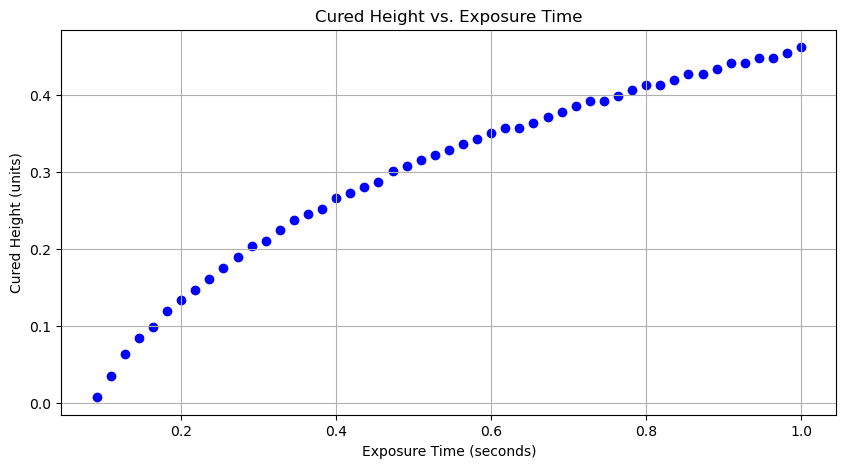

In [255]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from dataset import *
df_origin = pd.read_csv('./data_minmax_scale.csv')

unique_combinations = df_origin[['PI', 'Do', 'intensity']].drop_duplicates()
selected_combination = unique_combinations.sample(n=1)
selected_rows = df_origin[(df_origin['PI'] == selected_combination.iloc[0]['PI']) & (df_origin['Do'] == selected_combination.iloc[0]['Do']) & (df_origin['intensity'] == selected_combination.iloc[0]['intensity'])]

plt.figure(figsize=(10, 5))
plt.scatter(selected_rows['exposure_time'], selected_rows['cured_height'], color='blue')
plt.title('Cured Height vs. Exposure Time')
plt.xlabel('Exposure Time (seconds)')
plt.ylabel('Cured Height (units)')
plt.grid(True)
plt.show()

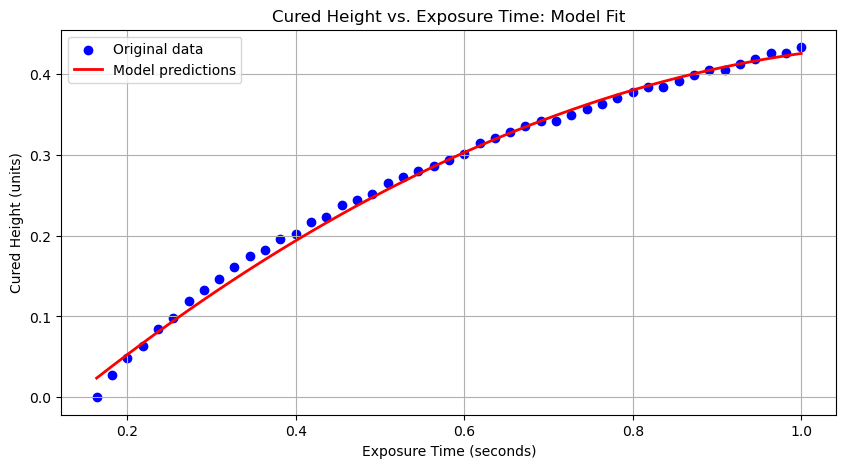

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Load the data
df_origin = pd.read_csv('./data_minmax_scale.csv')

# Sample unique combinations
unique_combinations = df_origin[['PI', 'Do', 'intensity']].drop_duplicates()
selected_combination = unique_combinations.sample(n=1)
selected_rows = df_origin[(df_origin['PI'] == selected_combination.iloc[0]['PI']) &
                          (df_origin['Do'] == selected_combination.iloc[0]['Do']) &
                          (df_origin['intensity'] == selected_combination.iloc[0]['intensity'])]

# Randomly sample 20 points for model training
sampled_data = selected_rows[['exposure_time', 'cured_height']].sample(n=20, random_state=1)

# Prepare data for polynomial regression
X_train = sampled_data['exposure_time'].values.reshape(-1, 1)
y_train = sampled_data['cured_height'].values

# Create a polynomial regression model
degree = 2  # You can adjust the degree of the polynomial here
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train, y_train)

# Use the model to predict over the entire selected data
X_full = selected_rows['exposure_time'].values.reshape(-1, 1)
y_full = selected_rows['cured_height'].values
y_pred = model.predict(X_full)

# Visualization
plt.figure(figsize=(10, 5))
plt.scatter(selected_rows['exposure_time'], selected_rows['cured_height'], color='blue', label='Original data')
plt.plot(selected_rows['exposure_time'], y_pred, color='red', label='Model predictions', linewidth=2)
plt.title('Cured Height vs. Exposure Time: Model Fit')
plt.xlabel('Exposure Time (seconds)')
plt.ylabel('Cured Height (units)')
plt.legend()
plt.grid(True)
plt.show()


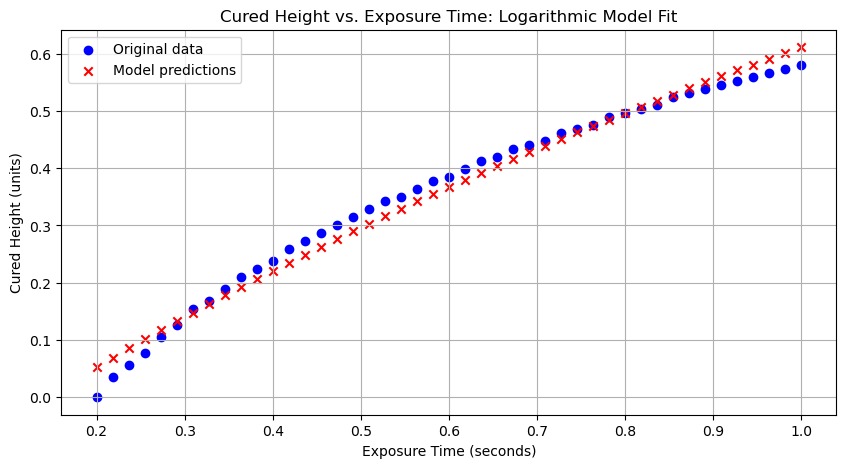

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the data
df_origin = pd.read_csv('./data_minmax_scale.csv')

# Sample unique combinations
unique_combinations = df_origin[['PI', 'Do', 'intensity']].drop_duplicates()
selected_combination = unique_combinations.sample(n=1)
selected_rows = df_origin[(df_origin['PI'] == selected_combination.iloc[0]['PI']) &
                          (df_origin['Do'] == selected_combination.iloc[0]['Do']) &
                          (df_origin['intensity'] == selected_combination.iloc[0]['intensity'])]

# Randomly sample 20 points for model training
sampled_data = selected_rows[['exposure_time', 'cured_height']].sample(n=20, random_state=1)

# Prepare data for logarithmic regression
# We add a small constant to avoid taking log of zero
X_train = np.log(sampled_data['exposure_time'].values.reshape(-1, 1) + 1)
y_train = sampled_data['cured_height'].values

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Use the model to predict over the entire selected data
X_full = np.log(selected_rows['exposure_time'].values.reshape(-1, 1) + 1)
y_full = selected_rows['cured_height'].values
y_pred = model.predict(X_full)

# Visualization
plt.figure(figsize=(10, 5))
plt.scatter(selected_rows['exposure_time'], selected_rows['cured_height'], color='blue', label='Original data')
plt.scatter(selected_rows['exposure_time'], y_pred, color='red', label='Model predictions', marker='x')
plt.title('Cured Height vs. Exposure Time: Logarithmic Model Fit')
plt.xlabel('Exposure Time (seconds)')
plt.ylabel('Cured Height (units)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
cured_heights = log_a(b * exposure_time + c) + d 형태의 함수에서 
a,b,c,d 파라미터를 예측

Number of data points available: 50
Optimized parameters: a=10.936827373505128, b=1.344039243342577, c=0.0988437698013615, d=0.6230655469259627


/tmp/ipykernel_1569001/147966300.py:29: RuntimeWarning: invalid value encountered in log
  return np.log(b * x + c) / np.log(a) + d


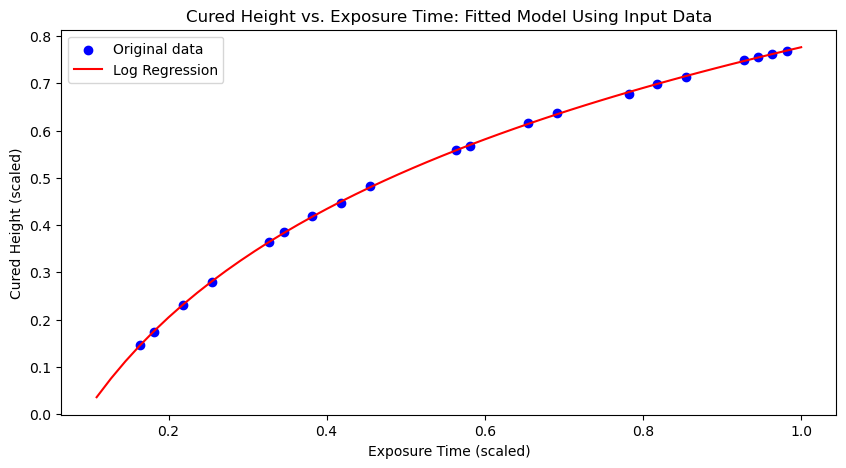

In [69]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# 데이터 로드
df_origin = pd.read_csv('./data_minmax_scale.csv')

# 임의의 샘플 데이터 선택
unique_combinations = df_origin[['PI', 'Do', 'intensity']].drop_duplicates()
selected_combination = unique_combinations.sample(n=1)
selected_rows = df_origin[(df_origin['PI'] == selected_combination.iloc[0]['PI']) &
                          (df_origin['Do'] == selected_combination.iloc[0]['Do']) &
                          (df_origin['intensity'] == selected_combination.iloc[0]['intensity'])]

# 선택된 데이터의 수를 확인
num_data_points = len(selected_rows)
print(f"Number of data points available: {num_data_points}")

# 데이터가 충분한지 확인하고 샘플링
if num_data_points >= 20:
    sampled_data = selected_rows.sample(n=20, random_state=42)
else:
    print("Not enough data to sample 20 points. Using all available data.")
    sampled_data = selected_rows  # 전체 데이터 사용

# 함수 정의
def model_function(x, a, b, c, d):
    return np.log(b * x + c) / np.log(a) + d

# 데이터 준비
x_data = sampled_data['exposure_time'].values
y_data = sampled_data['cured_height'].values

# 초기 파라미터 추측: [a, b, c, d]
initial_guess = [2, 1, 1, 1]

# 모델 파라미터 최적화
params, params_covariance = curve_fit(model_function, x_data, y_data, p0=initial_guess)

# 최적화된 파라미터 출력
print("Optimized parameters: a={}, b={}, c={}, d={}".format(params[0], params[1], params[2], params[3]))

# 전체 데이터셋에 대한 예측
x_full = selected_rows['exposure_time'].values
y_full = selected_rows['cured_height'].values
y_pred = model_function(x_full, *params)

# 시각화
plt.figure(figsize=(10, 5))
plt.scatter(x_data, y_data, color='blue', label='Original data')
plt.plot(x_full, y_pred, color='red', label='Log Regression')
plt.title('Cured Height vs. Exposure Time: Fitted Model Using Input Data')
plt.xlabel('Exposure Time (scaled)')
plt.ylabel('Cured Height (scaled)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(x_data, y_data, color='blue', label='Original data')
plt.scatter(x_full, y_pred, color='red', label='Log Regression')
plt.title('Cured Height vs. Exposure Time: Fitted Model Using Input Data')
plt.xlabel('Exposure Time (scaled)')
plt.ylabel('Cured Height (scaled)')
plt.legend()
plt.show()



In [145]:
import pandas as pd
import numpy as np

# 데이터 로드 (예제에서는 이미 로드된 데이터를 사용한다고 가정)
# df_origin = pd.read_csv('./data_minmax_scale.csv')

# 'exposure_time' 열의 고유한 값들을 추출하고 정렬
unique_exposure_times = df_origin['exposure_time'].unique()
sorted_unique_exposure_times = np.sort(unique_exposure_times)

# 정렬된 고유한 값들 출력
print(sorted_unique_exposure_times)



[0.         0.01818182 0.03636364 0.05454545 0.07272727 0.09090909
 0.10909091 0.12727273 0.14545455 0.16363636 0.18181818 0.2
 0.21818182 0.23636364 0.25454545 0.27272727 0.29090909 0.30909091
 0.32727273 0.34545455 0.36363636 0.38181818 0.4        0.41818182
 0.43636364 0.45454545 0.47272727 0.49090909 0.50909091 0.52727273
 0.54545455 0.56363636 0.58181818 0.6        0.61818182 0.63636364
 0.65454545 0.67272727 0.69090909 0.70909091 0.72727273 0.74545455
 0.76363636 0.78181818 0.8        0.81818182 0.83636364 0.85454545
 0.87272727 0.89090909 0.90909091 0.92727273 0.94545455 0.96363636
 0.98181818 1.        ]


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Optimized parameters: a=10.738899104178323, b=3.4281904091302557, c=0.275307689179257, d=0.315841461824247


/tmp/ipykernel_1569001/1777289188.py:23: RuntimeWarning: invalid value encountered in log
  return np.log(b * x + c) / np.log(a) + d


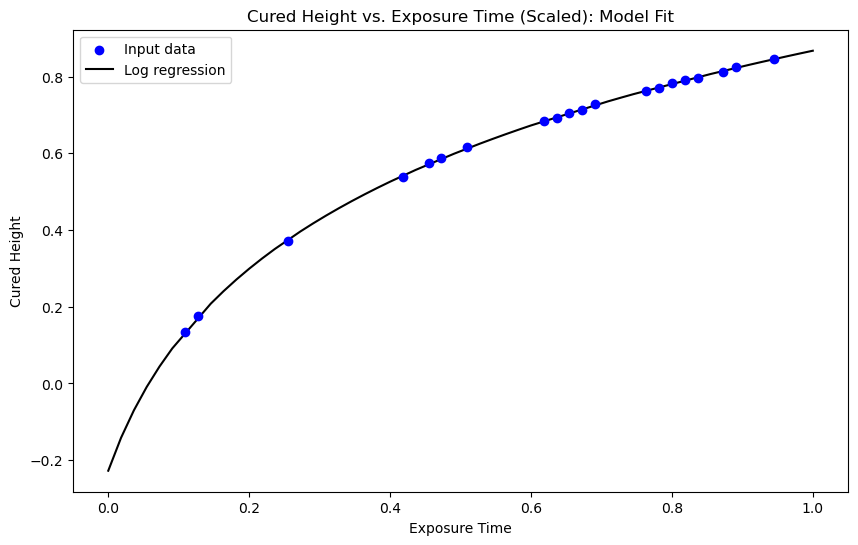

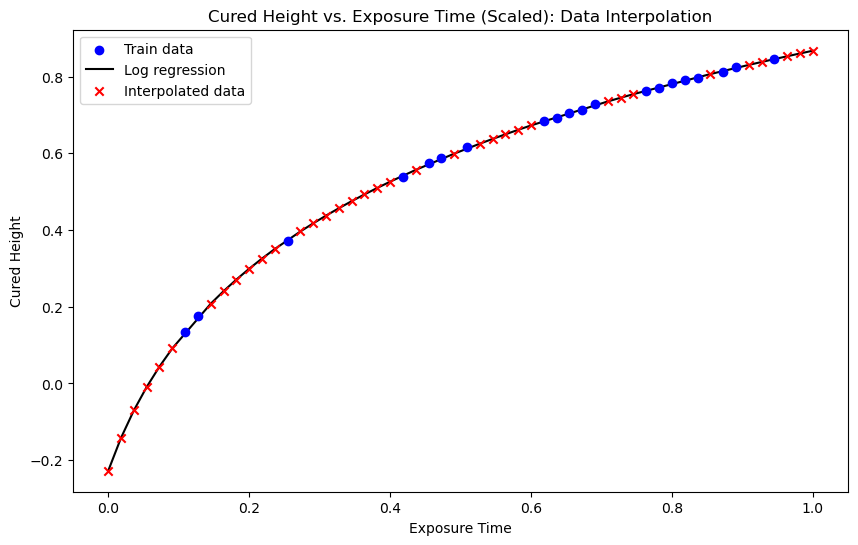

In [75]:
import torch
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from scipy.optimize import curve_fit

with open('./dataset2/test_dataset2-8.pkl', 'rb') as f:
            test_dataset2 = pickle.load(f)
# DataLoader 사용하여 데이터셋에서 모든 데이터 추출
loader = DataLoader(test_dataset2, batch_size=len(test_dataset2), shuffle=False)

# DataLoader에서 데이터 배치 가져오기 (전체 데이터셋)
for inputs, targets in loader:
    x_data = inputs[:, 1].numpy()  # 'exposure_time' 추정: 1번째 열
    y_data = inputs[:, 2].numpy()  # 'cured_height' 추정: 2번째 열

    intensity = inputs[:, 0].detach().numpy()
print(intensity)
# 모델 함수 정의
def model_function(x, a, b, c, d):
    return np.log(b * x + c) / np.log(a) + d

# 초기 파라미터 추측
initial_guess = [2, 1, 1, 1]

# 파라미터 최적화
params, params_covariance = curve_fit(model_function, x_data, y_data, p0=initial_guess)

# 최적화된 파라미터 출력
print("Optimized parameters: a={}, b={}, c={}, d={}".format(params[0], params[1], params[2], params[3]))

# Load the data
df_scaled = pd.read_csv('./data_minmax_scale.csv')
unique_exposure_times = df_scaled['exposure_time'].unique()
x_data_to_pred = np.sort(unique_exposure_times)

mask = np.isin(x_data_to_pred, x_data)
close_mask = np.array([np.any(np.isclose(x, x_data)) for x in x_data_to_pred])
combined_mask = mask | close_mask

# 근접한 값이나 정확히 일치하는 값을 제외합니다.
x_data_to_pred_filtered = x_data_to_pred[~combined_mask]

# x_data_to_pred_filtered에서 예측을 수행합니다.
y_pred_filtered = model_function(x_data_to_pred_filtered, *params)

# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, color='blue', label='Input data', zorder=3)  # zorder를 높여서 가장 앞에 그립니다.
plt.plot(x_data_to_pred_filtered, y_pred_filtered, color='black', label='Log regression', zorder=1)  # zorder를 낮춰서 뒤에 그립니다.
plt.title('Cured Height vs. Exposure Time (Scaled): Model Fit')
plt.xlabel('Exposure Time')
plt.ylabel('Cured Height')
plt.legend()
plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, color='blue', label='Train data', zorder=3)  # zorder를 높여서 가장 앞에 그립니다.
plt.plot(x_data_to_pred_filtered, y_pred_filtered, color='black', label='Log regression', zorder=1)  # zorder를 낮춰서 뒤에 그립니다.
plt.scatter(x_data_to_pred_filtered, y_pred_filtered, color='red', label='Interpolated data', marker='x', zorder=2)  # zorder를 중간으로 설정합니다.
plt.title('Cured Height vs. Exposure Time (Scaled): Data Interpolation')
plt.xlabel('Exposure Time')
plt.ylabel('Cured Height')
plt.legend()
plt.show()



[0.8727273  0.8909091  0.90909094 ... 0.96363634 0.9818182  1.        ]
Optimized parameters: a=22.790851104640712, b=2.4253627948596486, c=0.583029739868858, d=0.16687108389660577


/tmp/ipykernel_1569001/471156803.py:23: RuntimeWarning: invalid value encountered in log
  return np.log(b * x + c) / np.log(a) + d


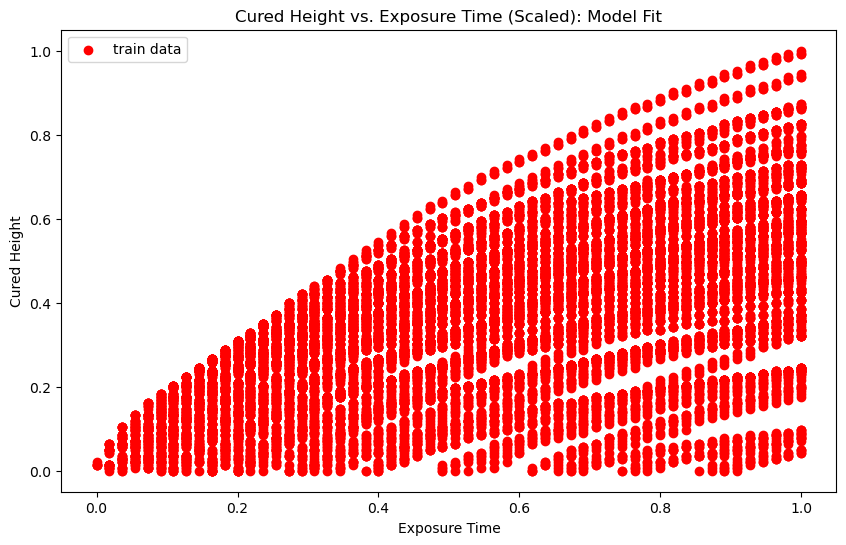

In [72]:
import torch
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from scipy.optimize import curve_fit

with open('./dataset2/train_dataset2.pkl', 'rb') as f:
            test_dataset2 = pickle.load(f)
# DataLoader 사용하여 데이터셋에서 모든 데이터 추출
loader = DataLoader(test_dataset2, batch_size=len(test_dataset2), shuffle=False)

# DataLoader에서 데이터 배치 가져오기 (전체 데이터셋)
for inputs, targets in loader:
    x_data = inputs[:, 1].numpy()  # 'exposure_time' 추정: 1번째 열
    y_data = inputs[:, 2].numpy()  # 'cured_height' 추정: 2번째 열

    intensity = inputs[:, 0].detach().numpy()
print(x_data)
# 모델 함수 정의
def model_function(x, a, b, c, d):
    return np.log(b * x + c) / np.log(a) + d

# 초기 파라미터 추측
initial_guess = [2, 1, 1, 1]

# 파라미터 최적화
params, params_covariance = curve_fit(model_function, x_data, y_data, p0=initial_guess)

# 최적화된 파라미터 출력
print("Optimized parameters: a={}, b={}, c={}, d={}".format(params[0], params[1], params[2], params[3]))

# Load the data
df_scaled = pd.read_csv('./data_minmax_scale.csv')
unique_exposure_times = df_scaled['exposure_time'].unique()
x_data_to_pred = np.sort(unique_exposure_times)

mask = np.isin(x_data_to_pred, x_data)
close_mask = np.array([np.any(np.isclose(x, x_data)) for x in x_data_to_pred])
combined_mask = mask | close_mask

# 근접한 값이나 정확히 일치하는 값을 제외합니다.
x_data_to_pred_filtered = x_data_to_pred[~combined_mask]

# x_data_to_pred_filtered에서 예측을 수행합니다.
y_pred_filtered = model_function(x_data_to_pred_filtered, *params)

# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, color='red', label='train data', zorder=3)  # zorder를 높여서 가장 앞에 그립니다.
plt.title('Cured Height vs. Exposure Time (Scaled): Model Fit')
plt.xlabel('Exposure Time')
plt.ylabel('Cured Height')
plt.legend()
plt.show()

In [240]:
from collections import Counter
from sklearn.neighbors import NearestNeighbors

with open('./dataset2/train_dataset2.pkl', 'rb') as f:
    train_dataset2 = pickle.load(f)
nearest = NearestNeighbors(n_neighbors=3)
nearest.fit(train_dataset2.input)

df_origin = pd.read_csv('./data_minmax_scale.csv')
unique_exposure_times = df_origin['exposure_time'].unique()
sorted_unique_exposure_times = np.sort(unique_exposure_times)

for i in range(10):
    with open('./dataset2/test_dataset2-' + str(i) + '.pkl', 'rb') as f:
        test_dataset2 = pickle.load(f)

    test_loader2 =  DataLoader(test_dataset2, batch_size=len(test_dataset2), shuffle=False)

    for inputs, targets in test_loader2:
        intensity_values = inputs[:, 0].numpy()  # 'intensity' 추정: 0번째 열
        x_data = inputs[:, 1].numpy()  # 'exposure_time' 추정: 1번째 열
        y_data = inputs[:, 2].numpy()  # 'cured_height' 추정: 2번째 열
        target_data = targets[:, ].numpy()
    
    # 모델 함수 정의
    def model_function(x, a, b, c, d):
        return np.log(b * x + c) / np.log(a) + d    
    
    # 초기 파라미터 추측
    initial_guess = [2, 1, 1, 1]
    params, params_covariance = curve_fit(model_function, x_data, y_data, p0=initial_guess)

    unique_exposure_times = df_origin['exposure_time'].unique()
    x_data_all = np.sort(unique_exposure_times)

    mask = np.isin(x_data_all, x_data)
    close_mask = np.array([np.any(np.isclose(x, x_data)) for x in x_data_all])
    combined_mask = mask | close_mask

    # 근접한 값이나 정확히 일치하는 값을 제외합니다.
    x_data_filtered = x_data_all[~combined_mask]

    # x_data_to_pred_filtered에서 예측을 수행합니다.
    y_pred_filtered = model_function(x_data_filtered, *params)
    print('iter' + str(i))
    
    intensity_repeated = np.repeat(intensity_values[0], len(x_data_filtered))
    new_inputs = np.column_stack((intensity_repeated, x_data_filtered, y_pred_filtered))
    
    if np.isnan(new_inputs).any():
        new_inputs = new_inputs[~np.isnan(new_inputs).any(axis=1)]
    new_inputs_filtered = new_inputs[new_inputs[:, 2] >= 0]
    distances, index = nearest.kneighbors(new_inputs_filtered)
    
    flattened_index = index.flatten()
    
    candidates = train_dataset2.target[flattened_index].view(-1, 2)
    candidates_rounded = np.round(candidates, decimals=4)

    # 텐서를 리스트의 튜플로 변환합니다. (numpy 배열을 통해)
    candidates_list = candidates_rounded.numpy().tolist()

    # 각 행의 빈도수 계산
    counter = Counter(tuple(row) for row in candidates_list)

    # 가장 많이 나타난 행 찾기
    most_common_candidate = counter.most_common(1)

    # 가장 많이 나타난 행과 그 빈도수 출력
    most_common_row, frequency = most_common_candidate[0]
    print(most_common_row, target_data[0], frequency)

iter0
(0.20000000298023224, 0.31029999256134033) [0.2        0.13793103] 26
iter1
(0.4000000059604645, 0.03449999913573265) [0.4        0.06896552] 14
iter2
(0.4000000059604645, 0.0) [0.4        0.10344828] 22
iter3
(0.800000011920929, 0.0689999982714653) [0.8 0. ] 21
iter4
(1.0, 0.03449999913573265) [1. 0.] 22
iter5
(0.20000000298023224, 0.0) [0.2        0.06896552] 24
iter6
(1.0, 0.10339999943971634) [1. 0.] 17
iter7
(0.4000000059604645, 0.6552000045776367) [0.4       0.6551724] 15
iter8
(0.20000000298023224, 0.31029999256134033) [0.2        0.13793103] 22
iter9
(0.4000000059604645, 0.03449999913573265) [0.4        0.03448276] 7


/tmp/ipykernel_1098632/1700026459.py:27: RuntimeWarning: invalid value encountered in log
  return np.log(b * x + c) / np.log(a) + d
/tmp/ipykernel_1098632/1700026459.py:27: RuntimeWarning: invalid value encountered in log
  return np.log(b * x + c) / np.log(a) + d
/tmp/ipykernel_1098632/1700026459.py:27: RuntimeWarning: invalid value encountered in log
  return np.log(b * x + c) / np.log(a) + d
/tmp/ipykernel_1098632/1700026459.py:27: RuntimeWarning: invalid value encountered in log
  return np.log(b * x + c) / np.log(a) + d
/tmp/ipykernel_1098632/1700026459.py:27: RuntimeWarning: invalid value encountered in log
  return np.log(b * x + c) / np.log(a) + d
/tmp/ipykernel_1098632/1700026459.py:27: RuntimeWarning: invalid value encountered in log
  return np.log(b * x + c) / np.log(a) + d
/tmp/ipykernel_1098632/1700026459.py:27: RuntimeWarning: invalid value encountered in log
  return np.log(b * x + c) / np.log(a) + d
/tmp/ipykernel_1098632/1700026459.py:27: RuntimeWarning: invalid valu

Epoch 100, Loss: 0.26772743463516235
Epoch 200, Loss: 0.25378188490867615
Epoch 300, Loss: 0.21867139637470245
Epoch 400, Loss: 0.14901579916477203
Epoch 500, Loss: 0.0667152851819992


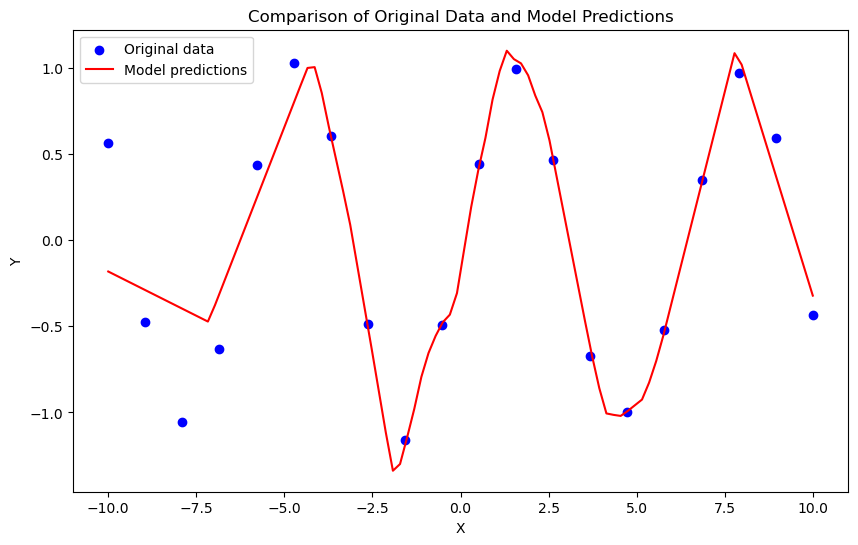

In [100]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# 데이터 준비
x_data = np.linspace(-10, 10, 20)
y_data = np.sin(x_data) + np.random.normal(0, 0.1, x_data.shape)
x_data = torch.tensor(x_data, dtype=torch.float32).view(-1, 1)
y_data = torch.tensor(y_data, dtype=torch.float32).view(-1, 1)

# 모델 정의
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(1, 50),
            nn.ReLU(),
            nn.Linear(50, 50),
            nn.ReLU(),
            nn.Linear(50, 1)
        )

    def forward(self, x):
        return self.linear_relu_stack(x)

# 모델 인스턴스 생성
model = NeuralNetwork()

# 손실 함수 및 최적화 방법 설정
loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 훈련 과정
def train_loop(model, loss_function, optimizer, x_data, y_data):
    for epoch in range(500):
        # 예측 및 손실 계산
        pred = model(x_data)
        loss = loss_function(pred, y_data)

        # 역전파
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # 100 에포크마다 로그 출력
        if epoch % 100 == 99:
            print(f"Epoch {epoch+1}, Loss: {loss.item()}")

# 모델 훈련
train_loop(model, loss_function, optimizer, x_data, y_data)

# 새로운 데이터에 대한 예측
x_test = torch.linspace(-10, 10, 100).view(-1, 1)
predictions = model(x_test).detach().numpy()

# 데이터 시각화
plt.figure(figsize=(10, 6))
plt.scatter(x_data.numpy(), y_data.numpy(), color='blue', label='Original data')
plt.plot(x_test.numpy(), predictions, color='red', label='Model predictions')
plt.title('Comparison of Original Data and Model Predictions')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


In [70]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from dataset import *
df_origin = pd.read_csv('./data_origin_scale.csv')

unique_combinations = df_origin[['PI', 'Do', 'intensity']].drop_duplicates()
selected_combination = unique_combinations.sample(n=3)
selected_rows1 = df_origin[(df_origin['PI'] == selected_combination.iloc[0]['PI']) & (df_origin['Do'] == selected_combination.iloc[0]['Do']) & (df_origin['intensity'] == selected_combination.iloc[0]['intensity'])]
selected_rows2 = df_origin[(df_origin['PI'] == selected_combination.iloc[0]['PI']) & (df_origin['Do'] == selected_combination.iloc[1]['Do']) & (df_origin['intensity'] == selected_combination.iloc[1]['intensity'])]

print(selected_rows1)
print(selected_rows2)

          PI            Do  intensity  exposure_time  cured_height
12444  15000  4.000000e-12      0.005              0             0
12445  15000  4.000000e-12      0.005              5             0
12446  15000  4.000000e-12      0.005             10             0
12447  15000  4.000000e-12      0.005             15             0
12448  15000  4.000000e-12      0.005             20             0
...      ...           ...        ...            ...           ...
12500  15000  4.000000e-12      0.005            280            69
12501  15000  4.000000e-12      0.005            285            70
12502  15000  4.000000e-12      0.005            290            70
12503  15000  4.000000e-12      0.005            295            71
12504  15000  4.000000e-12      0.005            300            72

[61 rows x 5 columns]
          PI            Do  intensity  exposure_time  cured_height
12932  15000  6.000000e-12      0.003              0             0
12933  15000  6.000000e-12      0.003  

In [75]:
import pandas as pd
import torch
import pickle
from sklearn.neighbors import NearestNeighbors

with open('./dataset2/train_dataset2.pkl', 'rb') as f:
    train_dataset2 = pickle.load(f)

print(train_dataset2.input)
np.array(train_dataset2.input)
nearest = NearestNeighbors(n_neighbors=2)
nearest.fit(train_dataset2.input)

input = np.array([[0.1111, 0.8727, 0.0140]])
distances, indices = nearest.kneighbors(input)

print(indices)
print(train_dataset2.input[indices])

tensor([[0.1111, 0.8727, 0.0140],
        [0.1111, 0.8909, 0.0350],
        [0.1111, 0.9091, 0.0420],
        ...,
        [1.0000, 0.9636, 0.5594],
        [1.0000, 0.9818, 0.5664],
        [1.0000, 1.0000, 0.5734]])
[[  0 340]]
tensor([[0.1111, 0.8727, 0.0140],
        [0.1111, 0.8909, 0.0070]])
